In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import os
%matplotlib inline

Чтение данных

In [2]:
# app_events = pd.read_csv('app_events.csv', dtype={"event_id":np.int32, "device_id": np.int64, 
# "is_installed": np.int8, "is_active": np.int8})
rel_path = os.getcwd()
events = pd.read_csv(os.path.join(rel_path, 'events.csv'))
gender_age = pd.read_csv(os.path.join(rel_path, 'gender_age_train.csv'))
girls = gender_age[gender_age['gender']=='F'].copy()
boys = gender_age[gender_age['gender']=='M'].copy()
phone_brand_dev_model = pd.read_csv(os.path.join(rel_path, 'phone_brand_device_model.csv'))
mapping = pd.read_csv(os.path.join(rel_path, 'brand_mapping.csv'))
phone_brand_dev_model = pd.merge(phone_brand_dev_model, mapping, on='phone_brand')
print phone_brand_dev_model.head()

             device_id phone_brand device_model brand_eng
0 -8890648629457979026          小米           红米    Xiaomi
1  1277779817574759137          小米         MI 2    Xiaomi
2 -3883532755183027260          小米        MI 2S    Xiaomi
3 -5827952925479472594          小米  MI One Plus    Xiaomi
4 -5776341595519925628          小米        MI 2A    Xiaomi


Количество уникальных географических локаций

In [3]:
events['coord'] = zip(events['longitude'], events['latitude'])

print len(set(events.loc[:,'coord'].tolist()))

67161


Самые частые события

In [4]:
most_freq = pd.merge(events, phone_brand_dev_model, on='device_id')
most_freq = most_freq.groupby(['phone_brand']).count().iloc[:,0:1]
most_freq.columns = ['count']
most_freq = most_freq.sort_values(['count'], ascending=False).head(20)
most_freq_list = most_freq.index.tolist()
most_freq.index = range(len(most_freq.index))
most_freq['phone_brand'] = pd.Series(most_freq_list, index=most_freq.index)

Самые популярные бренды

In [5]:
mstfq_phone_brand_dev_model = pd.merge(phone_brand_dev_model, most_freq, on='phone_brand')
print mstfq_phone_brand_dev_model.head()

             device_id phone_brand device_model brand_eng   count
0 -8890648629457979026          小米           红米    Xiaomi  625675
1  1277779817574759137          小米         MI 2    Xiaomi  625675
2 -3883532755183027260          小米        MI 2S    Xiaomi  625675
3 -5827952925479472594          小米  MI One Plus    Xiaomi  625675
4 -5776341595519925628          小米        MI 2A    Xiaomi  625675


Построение распределение дем.групп по phone_brand с разбиением по полу.

In [6]:
brand_girls = pd.merge(girls, mstfq_phone_brand_dev_model, on='device_id')
brand_boys = pd.merge(boys, mstfq_phone_brand_dev_model, on='device_id')

In [7]:
print brand_girls.head()
print len(brand_girls.index)
print len(brand_boys.index)

             device_id gender  age   group phone_brand   device_model  \
0 -1297074871525174196      F   24  F24-26        OPPO            R1C   
1  1596610250680140042      F   36  F33-42          三星      Galaxy S4   
2  7477216237379271436      F   37  F33-42          华为       荣耀6 plus   
3  2478205222798310601      F   28  F27-28          三星  Galaxy Note 3   
4  1508636020748379883      F   28  F27-28          华为         荣耀畅玩4X   

  brand_eng   count  
0      OPPO  233594  
1   samsung  402756  
2    Huawei  941714  
3   samsung  402756  
4    Huawei  941714  
25987
46566


In [8]:
brand_girls_pivot = brand_girls.pivot_table(values='gender', index=['group'], columns= ['brand_eng'], aggfunc='count')
brand_boys_pivot = brand_boys.pivot_table(values='gender', index=['group'], columns= ['brand_eng'], aggfunc='count')

Бренды - демо группы

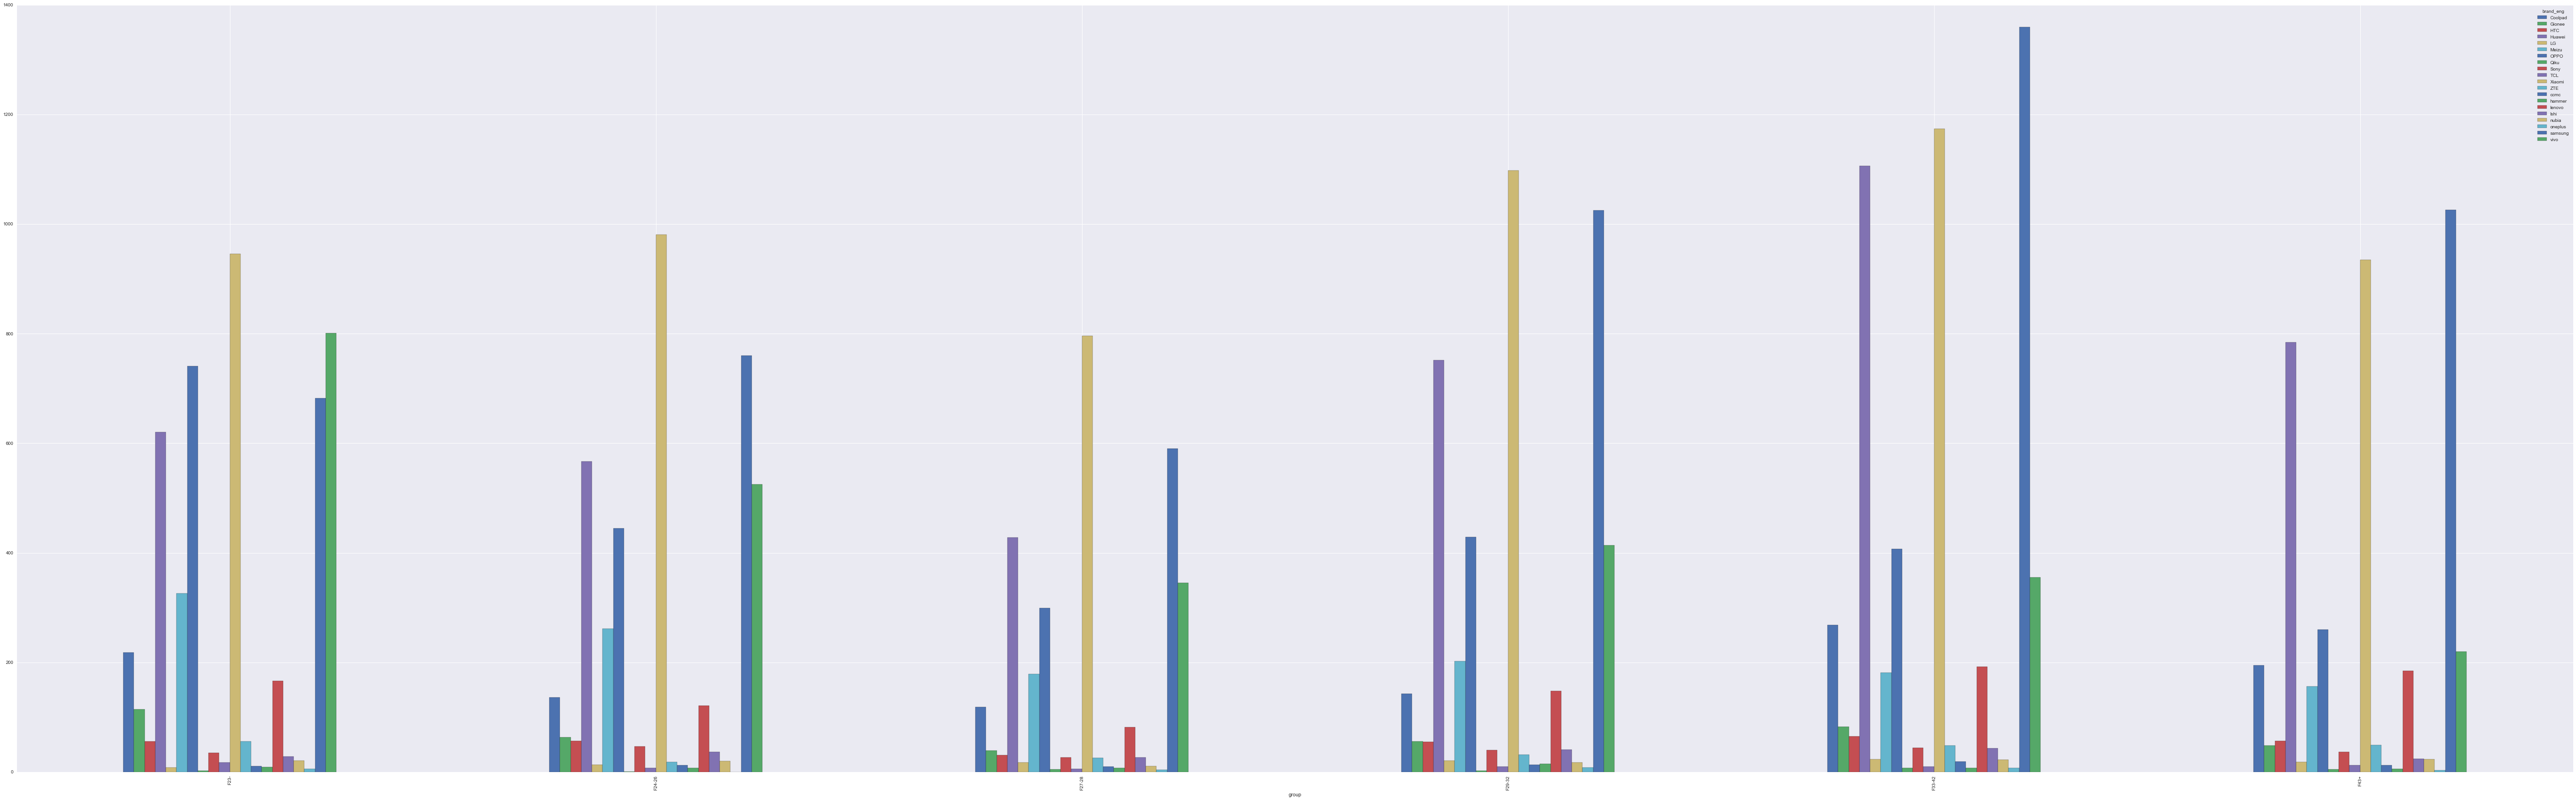

In [9]:
brand_girls_pivot.plot(kind='bar', figsize=(100,30))

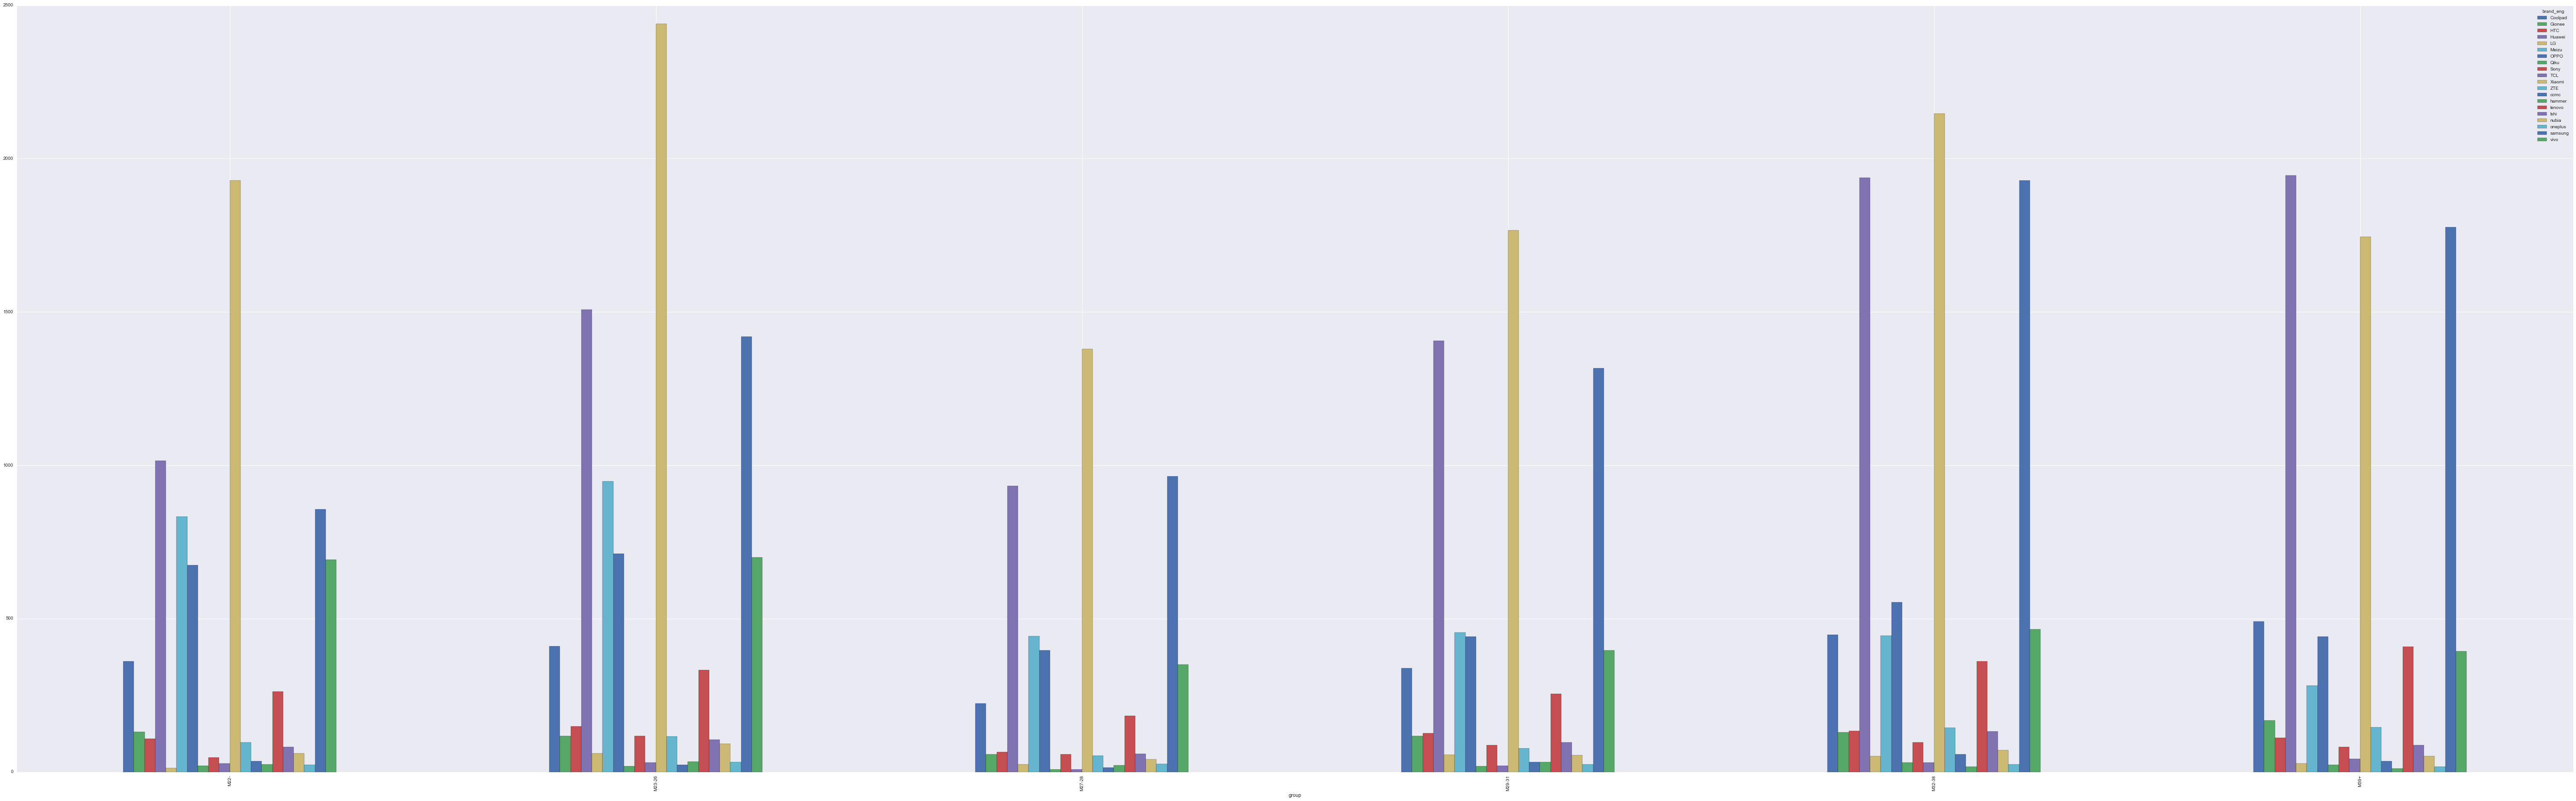

In [10]:
brand_boys_pivot.plot(kind='bar', figsize=(100,30))

In [11]:
devmodel_girls_pivot = brand_girls.pivot_table(values='gender', index=['group'], columns= ['device_model'], aggfunc='count')
devmodel_boys_pivot = brand_boys.pivot_table(values='gender', index=['group'], columns= ['device_model'], aggfunc='count')

In [ ]:
Модели - демо группы

In [12]:
devmodel_girls_pivot.plot(kind='bar', figsize=(100,30))

In [13]:
devmodel_boys_pivot.plot(kind='bar', figsize=(100,30))

MemoryError: In RendererAgg: Out of memory